In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt

# Function to apply log2 normalization to the raw counts
def log2_normalize(counts):
    return np.log2(counts + 1)


In [2]:
pseudobulk = pd.read_csv("C:\\Users\\HP\\Desktop\\new ascend data\\PBMC_new_data\\PBMC_PSEUDOBULK.csv", index_col=0)

cell_fractions = pd.read_csv("C:\\Users\\HP\\Desktop\\new ascend data\\PBMC_new_data\\cell_fractions_PBMC.csv", index_col=0)


In [3]:
signature_matrix_pbmc = pd.read_csv("C:\\Users\\HP\\Desktop\\new ascend data\\dynamic_signature_matrix.csv", index_col=0)

In [4]:
common_genes = pseudobulk.index.intersection(signature_matrix_pbmc.index)

In [5]:
pseudobulk = pseudobulk.loc[common_genes]

In [6]:
signature_matrix_pbmc = signature_matrix_pbmc.loc[common_genes]

In [7]:
signature_matrix_pbmc.shape

(26795, 12)

In [8]:
pseudobulk.shape

(26795, 1000)

In [9]:
signature_matrix_pbmc

,Monocyte,T_cells,NK_cell,B_cell,Pre-B_cell_CD34-,HSC_-G-CSF,GMP,Platelets,CMP,MEP,Pro-B_cell_CD34+,Neutrophils
AL627309.1,0.053309,-0.029933,-0.031940,-0.026223,0.036371,0.087223,0.072603,-0.056400,0.210786,0.395000,-0.034957,-0.018775
AL627309.3,0.039591,-0.003808,0.012337,0.008420,0.093943,0.018011,0.069718,0.185506,-0.052303,-0.139412,0.084330,0.107000
AL627309.5,0.305402,-0.214935,-0.157354,-0.205479,-0.236863,0.152014,-0.296982,-0.074368,-0.460492,-0.944737,-0.200033,0.011653
AL627309.4,0.053610,-0.028052,-0.008131,-0.019135,0.068900,0.032483,-0.004833,0.102030,-0.150494,-0.342238,0.041943,0.136559
AP006222.2,-0.016506,0.007856,0.005276,0.023424,-0.010001,0.032764,0.056435,0.095197,0.188023,-0.011055,0.062218,-0.051932
...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,-0.049395,-0.004410,-0.014040,0.003913,0.150024,-0.041402,0.101629,-0.167344,0.341568,0.703077,-0.026408,-0.056260
AC233755.1,0.005334,0.022834,0.013263,0.032072,0.163931,0.073118,0.236542,-0.155979,0.177311,0.469212,-0.063496,-0.132006
AC023491.2,-0.020640,-0.007594,-0.000633,-0.000239,0.137208,-0.039402,0.005019,-0.070702,-0.043036,-0.346775,-0.062695,-0.114589
AC007325.1,0.018167,-0.001951,0.013426,-0.000896,-0.063410,0.019422,-0.007934,0.113378,-0.084745,-0.281020,0.042124,0.019344


In [10]:
signature_matrix_pbmc_expanded = signature_matrix_pbmc

In [11]:
cell_type_dim = signature_matrix_pbmc_expanded.shape[1]

In [12]:
pseudobulk = pseudobulk.transpose()

pseudobulk_log2 = log2_normalize(pseudobulk.values)


# Step 3: Normalize pseudobulk data (after log2 transformation)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(pseudobulk_log2)

Y = cell_fractions.values


In [13]:
Y = cell_fractions.values

# Step 4: Split the pseudobulk data into train, validation, and test sets (60% train, 20% validation, 20% test)
X_train, X_temp, Y_train, Y_temp = train_test_split(X_normalized, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)




In [14]:
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1] 

In [15]:
num_cell_types = Y_train.shape[1]

In [16]:
signature_matrix_pbmc_expanded_log2 = signature_matrix_pbmc_expanded                                                                                                                                                             


signature_matrix_pbmc_expanded_normalized = signature_matrix_pbmc_expanded_log2

In [17]:
import torch

# Assuming signature_matrix_pbmc_expanded is your DataFrame
signature_matrix_pbmc_expanded_tensor = torch.tensor(signature_matrix_pbmc_expanded_normalized.values, dtype=torch.float32)


In [119]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define DeconvolutionModel1 with all components
class DeconvolutionModel1(nn.Module):
    def __init__(self, input_dim, hidden_dim, attention_dim, output_dim, signature_matrix):
        super(DeconvolutionModel1, self).__init__()
        self.encoder = self.Encoder(input_dim, hidden_dim, attention_dim)
        self.decoder = self.Decoder(hidden_dim, output_dim, signature_matrix)
        self.optimizer = optim.Adam(self.parameters(), lr=1e-4)  # Optimizer
        self.signature_matrix = signature_matrix  # Store the signature matrix

    class AttentionBlock(nn.Module):
        def __init__(self, input_dim, hidden_dim):
            super(DeconvolutionModel1.AttentionBlock, self).__init__()
            self.attn = nn.MultiheadAttention(embed_dim=input_dim, num_heads=8, dropout=0.1)
            self.fc = nn.Linear(input_dim, hidden_dim)

        def forward(self, x):
            attn_output, _ = self.attn(x, x, x)  # Self-attention
            x = self.fc(attn_output)  # Linear transformation
            return x

    class Encoder(nn.Module):
        def __init__(self, input_dim, hidden_dim, attention_dim):
            super(DeconvolutionModel1.Encoder, self).__init__()
            self.fc1 = nn.Linear(input_dim, 2048)
            self.attention1 = DeconvolutionModel1.AttentionBlock(2048, 1024)
            self.fc2 = nn.Linear(1024, 512)
            self.dropout1 = nn.Dropout(0.1)
        
        def forward(self, x):
            x = F.relu(self.fc1(x))  # First MLP layer
            x = self.attention1(x.unsqueeze(0)).squeeze(0)
            x = F.relu(self.fc2(x))  # Second MLP layer
            x = self.dropout1(x)
            return x

    class Decoder(nn.Module):
        def __init__(self, hidden_dim, output_dim, signature_matrix):
            super(DeconvolutionModel1.Decoder, self).__init__()
            self.fc2 = nn.Linear(512, 1024)
            self.fc3_fractions = nn.Linear(1024, output_dim)  # Output for cell fractions
            self.gep_matrix = nn.Parameter(torch.randn(input_dim, output_dim))
            self.signature_matrix = signature_matrix  # Store the signature matrix

        def forward(self, x):
            x = F.relu(self.fc2(x))
        
            # Predict cell fractions
            cell_fractions = F.softmax(self.fc3_fractions(x), dim=-1)  # Predicted cell fractions
            # Reconstruct pseudobulk data (B = G * C)
            reconstructed_pseudobulk = torch.matmul(cell_fractions, self.signature_matrix.T)
        
            return cell_fractions, reconstructed_pseudobulk, self.gep_matrix

    def forward(self, x):
        encoded = self.encoder(x)  # Encode input
        cell_fractions, reconstructed_pseudobulk, gep = self.decoder(encoded)  # Decode to get predictions
        return cell_fractions, reconstructed_pseudobulk, gep


In [120]:
def compute_ccc(y_true, y_pred):
    """Compute Concordance Correlation Coefficient (CCC)"""
    mean_true = torch.mean(y_true)
    mean_pred = torch.mean(y_pred)
    covariance = torch.mean((y_true - mean_true) * (y_pred - mean_pred))
    variance_true = torch.var(y_true)
    variance_pred = torch.var(y_pred)

    ccc = (2 * covariance) / (variance_true + variance_pred + (mean_true - mean_pred) ** 2)
    return ccc.item()  # Return as a Python float

def compute_rmse(y_true, y_pred):
    """Compute Root Mean Square Error (RMSE)"""
    rmse = torch.sqrt(torch.mean((y_true - y_pred) ** 2))
    return rmse.item()  # Return as a Python float

In [121]:

class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        # Euclidean distance
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim=True)
        
        # Contrastive loss calculation
        loss_contrastive = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss_contrastive


In [122]:
i = 4

In [123]:
ccc_file_path = f"C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\{i} train\\epoch1_ccc{i}.csv"
rmse_file_path = f"C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\{i} train\\epoch1_rmse{i}.csv"
val_loss_file_path = f"C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\{i} train\\epoch1_val_loss{i}.csv"

In [124]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import csv

# Create lists to store per epoch CCC, RMSE, and validation loss separately
epoch_ccc_list = []
epoch_rmse_list = []
epoch_val_loss_list = []


# Assuming DeconvolutionModel1 is defined as shown in the previous response.

input_dim = X_train.shape[1]
output_dim = Y_train.shape[1] 
hidden_dim = 256
attention_dim = 1024
gep_output_dim = input_dim  # Number of genes
signature_dim = output_dim

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize DeconvolutionModel1 and Autoencoder
model = DeconvolutionModel1(input_dim, hidden_dim, attention_dim, output_dim, signature_matrix_pbmc_expanded_tensor).to(device)
#autoencoder = Autoencoder(gep_output_dim).to(device)


# Define loss function (MSE Loss for cell fractions)
loss_function = nn.MSELoss()
contrastive_loss_fn = ContrastiveLoss(margin=0.1)
# Number of epochs
num_epochs = 100

# Training loop
model = DeconvolutionModel1(input_dim=input_dim, hidden_dim=256, attention_dim=1024, output_dim=output_dim, signature_matrix=signature_matrix_pbmc_expanded_tensor)
#autoencoder = Autoencoder(gep_output_dim)
optimizer = optim.Adam(list(model.parameters()), lr=0.0001)
#optimizer = model.optimizer

l1 = 0.01 # Kl_div loss
l2 = 0.01  # pseudobulk_reconstruction_loss
l3 = 0.01 #Contrastive loss
l4 = 1   #pseudo loss1
l5 = 1

# Define KL Divergence function
kl_loss_function = nn.KLDivLoss(reduction="batchmean")  # Use batch mean for KL loss

for epoch in range(num_epochs):
    model.train()  # Set deconvolution model to training mode
    #autoencoder.train()  # Set autoencoder to training mode

    # Forward pass through the deconvolution model
    cell_fractions, reconstructed_pseudobulk, gep_predictions = model(X_train_tensor)  # X_train shape: (1000, 26805)
    pseudo_bulk_pred_gep_and_Y_train = torch.matmul(Y_train_tensor, gep_predictions.T)
    loss_pseudo1 = loss_function(X_train_tensor, pseudo_bulk_pred_gep_and_Y_train)

    loss_gep_sig = loss_function(gep_predictions, signature_matrix_pbmc_expanded_tensor)

    # Compute supervised training loss (cell fractions)
    train_loss = loss_function(cell_fractions, Y_train_tensor)  # Y_train shape: (1000, 12)

    # Compute unsupervised reconstruction loss using the autoencoder
    #reconstructed_geps = autoencoder(gep_predictions)  # Pass gep_predictions through the autoencoder
    #gep_pred_loss = loss_function(reconstructed_geps, gep_predictions)
    
    pseudobulk_reconstruction_loss = loss_function(X_train_tensor, reconstructed_pseudobulk) 

    # Define a prior distribution for the cell fractions (e.g., uniform prior)
    prior = torch.full_like(Y_train_tensor, fill_value=1.0 / output_dim).to(device)

    # Compute KL divergence loss for cell fractions
    kl_div_loss = kl_loss_function(torch.log_softmax(cell_fractions, dim=-1), prior)
    labels = torch.ones_like(cell_fractions)  # Labels for contrastive loss (e.g., 1 for true pairs)
    contrastive_loss = contrastive_loss_fn(cell_fractions, Y_train_tensor, labels)

    # Add KL divergence, supervised loss, and autoencoder reconstruction loss to the total loss
    total_loss = train_loss + l1 * kl_div_loss + l2 * pseudobulk_reconstruction_loss + l4 * loss_pseudo1 + l5 * loss_gep_sig

    # Backward pass and optimizer step
    optimizer.zero_grad()  # Clear gradients
    total_loss.backward()  # Backpropagation using total loss
    optimizer.step()  # Update model parameters

    # Validation phase
    model.eval()  # Set deconvolution model to evaluation mode
    #autoencoder.eval()  # Set autoencoder to evaluation mode
    with torch.no_grad():
        val_cell_fractions, val_pseudobulk_reconstructed, val_gep_predictions = model(X_val_tensor)  # X_val shape: (validation_samples, 26805)
        val_loss = loss_function(val_cell_fractions, Y_val_tensor)  # Y_val shape: (validation_samples, 12)

        # Compute CCC and RMSE for validation set
        val_ccc = compute_ccc(Y_val_tensor, val_cell_fractions)
        val_rmse = compute_rmse(Y_val_tensor, val_cell_fractions)

    # Store the per epoch validation metrics in separate lists
    epoch_ccc_list.append(val_ccc)
    epoch_rmse_list.append(val_rmse)
    epoch_val_loss_list.append(val_loss.item())


    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {total_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}, CCC: {val_ccc:.4f}, RMSE: {val_rmse:.4f}')
    

Epoch [10/100], Training Loss: 2.2219, Validation Loss: 0.0009, CCC: 0.7511, RMSE: 0.0293
Epoch [20/100], Training Loss: 2.2195, Validation Loss: 0.0005, CCC: 0.8626, RMSE: 0.0219
Epoch [30/100], Training Loss: 2.2174, Validation Loss: 0.0004, CCC: 0.8997, RMSE: 0.0194
Epoch [40/100], Training Loss: 2.2155, Validation Loss: 0.0003, CCC: 0.9110, RMSE: 0.0184
Epoch [50/100], Training Loss: 2.2135, Validation Loss: 0.0003, CCC: 0.9134, RMSE: 0.0182
Epoch [60/100], Training Loss: 2.2116, Validation Loss: 0.0003, CCC: 0.9192, RMSE: 0.0176
Epoch [70/100], Training Loss: 2.2097, Validation Loss: 0.0003, CCC: 0.9174, RMSE: 0.0178
Epoch [80/100], Training Loss: 2.2078, Validation Loss: 0.0003, CCC: 0.9193, RMSE: 0.0177
Epoch [90/100], Training Loss: 2.2059, Validation Loss: 0.0003, CCC: 0.9206, RMSE: 0.0175
Epoch [100/100], Training Loss: 2.2040, Validation Loss: 0.0003, CCC: 0.9213, RMSE: 0.0175


In [125]:
# Save CCC values to the specific path
with open(ccc_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Epoch', 'Per Epoch CCC'])
    for epoch in range(num_epochs):
        writer.writerow([epoch + 1, epoch_ccc_list[epoch]])

# Save RMSE values to the specific path
with open(rmse_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Epoch', 'Per Epoch RMSE'])
    for epoch in range(num_epochs):
        writer.writerow([epoch + 1, epoch_rmse_list[epoch]])

# Save Validation Loss values to the specific path
with open(val_loss_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Epoch', 'Per Epoch Validation Loss'])
    for epoch in range(num_epochs):
        writer.writerow([epoch + 1, epoch_val_loss_list[epoch]])

print(f"Separate CSV files have been saved to: {ccc_file_path}, {rmse_file_path}, and {val_loss_file_path}.")

Separate CSV files have been saved to: C:\Users\HP\Desktop\New Ascend Results\PBMC\multihead tuning graphs\4 train\epoch1_ccc4.csv, C:\Users\HP\Desktop\New Ascend Results\PBMC\multihead tuning graphs\4 train\epoch1_rmse4.csv, and C:\Users\HP\Desktop\New Ascend Results\PBMC\multihead tuning graphs\4 train\epoch1_val_loss4.csv.


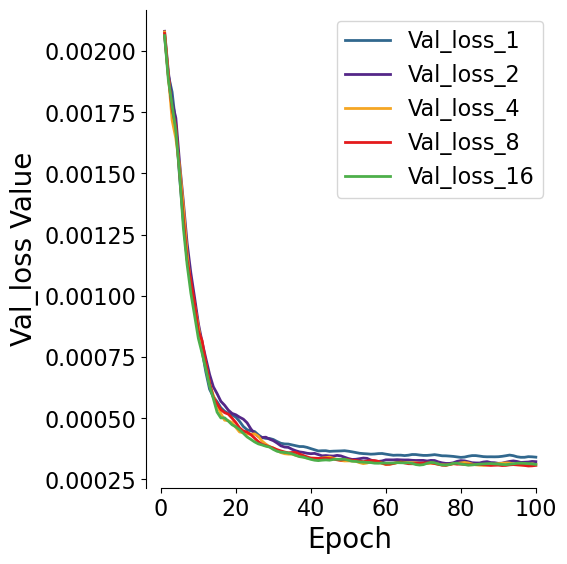

In [133]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Axes

# Path to the folder containing the 5 train folders
base_path = "C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\"

# Folder names
folders = ["1 train", "2 train", "3 train", "4 train", "5 train"]

file_names_val = ["epoch1_val_loss1.csv", "epoch1_val_loss2.csv", "epoch1_val_loss3.csv", "epoch1_val_loss4.csv", "epoch1_val_loss5.csv"]

plot_labels_val = ["Val_loss_1", "Val_loss_2", "Val_loss_4", "Val_loss_8", "Val_loss_16"]

colors_val = ['#31688e', '#542788', '#F5A623', '#E41A1C', '#4DAF4A']


# Create a new figure for CCC
plt.figure(figsize=(6, 6))

# Iterate over each folder and corresponding file to extract and plot "per epoch ccc" values
for i, (folder, file_name) in enumerate(zip(folders, file_names_val)):
    file_path = os.path.join(base_path, folder, file_name)
    
    # Read the CSV into a dataframe
    df = pd.read_csv(file_path)
    
    # Extract the first column (epoch) and second column (per epoch ccc)
    if df.shape[1] >= 2:  # Ensure there are at least two columns
        epochs = df.iloc[:, 0].values  # First column is 'epoch'
        val_values = df.iloc[:, 1].values  # Second column is 'per epoch ccc'
        
        # Plot the 'per epoch ccc' values against 'epoch'
        plt.plot(epochs, val_values, label=plot_labels_val[i], color=colors_val[i], linewidth=2)

# Add labels and legend for val loss
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Val_loss Value', fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
y_min, y_max = plt.ylim()
plt.gca().spines['left'].set_bounds(y_min, y_max)
plt.gca().spines['bottom'].set_bounds(0, 100)

# Increase tick label size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout(pad=2)
# Save the CCC plot
plt.savefig("C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\Val_Loss1_plot.png", dpi = 1200)  # Update the path as needed

# Display the CCC plot
plt.show()

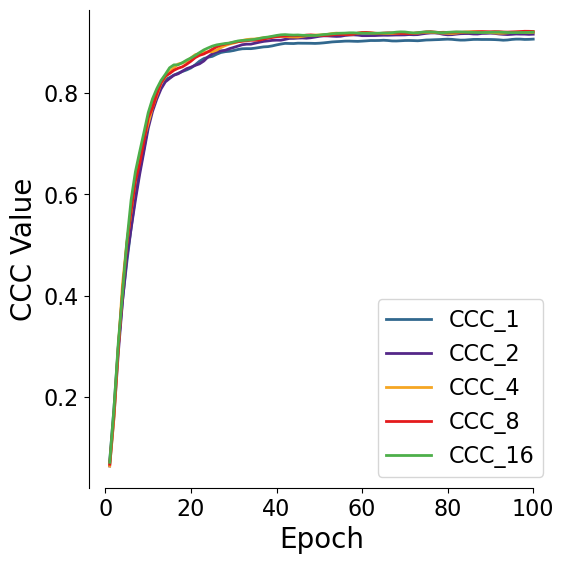

In [130]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Axes

# Path to the folder containing the 5 train folders
base_path = "C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\"

# Folder names
folders = ["1 train", "2 train", "3 train", "4 train", "5 train"]

# File names corresponding to the epoch_ccc and epoch_rmse files in each folder
file_names_ccc = ["epoch1_ccc1.csv", "epoch1_ccc2.csv", "epoch1_ccc3.csv", "epoch1_ccc4.csv", "epoch1_ccc5.csv"]


# Plot labels
plot_labels_ccc = ["CCC_1", "CCC_2", "CCC_4", "CCC_8", "CCC_16"]

# Colorblind-friendly colors
# Colorblind-friendly colors
colors_ccc = ['#31688e', '#542788', '#F5A623', '#E41A1C', '#4DAF4A']

# Create a new figure for CCC
plt.figure(figsize=(6, 6))

# Iterate over each folder and corresponding file to extract and plot "per epoch ccc" values
for i, (folder, file_name) in enumerate(zip(folders, file_names_ccc)):
    file_path = os.path.join(base_path, folder, file_name)
    
    # Read the CSV into a dataframe
    df = pd.read_csv(file_path)
    
    # Extract the first column (epoch) and second column (per epoch ccc)
    if df.shape[1] >= 2:  # Ensure there are at least two columns
        epochs = df.iloc[:, 0].values  # First column is 'epoch'
        ccc_values = df.iloc[:, 1].values  # Second column is 'per epoch ccc'
        
        # Plot the 'per epoch ccc' values against 'epoch'
        plt.plot(epochs, ccc_values, label=plot_labels_ccc[i], color=colors_ccc[i], linewidth=2)

# Add labels and legend for CCC
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('CCC Value', fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
y_min, y_max = plt.ylim()
plt.gca().spines['left'].set_bounds(y_min, y_max)
plt.gca().spines['bottom'].set_bounds(0, 100)

# Increase tick label size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout(pad=2)
# Save the CCC plot
plt.savefig("C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\CCC1_plot.png", dpi = 1200)  # Update the path as needed

# Display the CCC plot
plt.show()



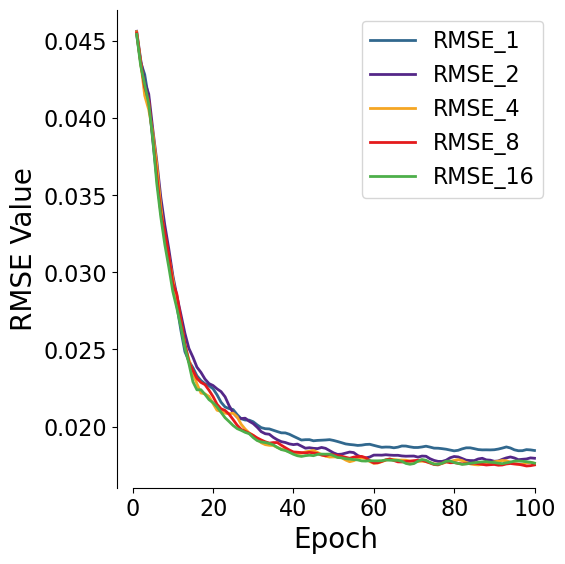

In [131]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Axes

# Path to the folder containing the 5 train folders
base_path = "C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\"

# Folder names
folders = ["1 train", "2 train", "3 train", "4 train", "5 train"]
file_names_rmse = ["epoch1_rmse1.csv", "epoch1_rmse2.csv", "epoch1_rmse3.csv", "epoch1_rmse4.csv", "epoch1_rmse5.csv"]
plot_labels_rmse = ["RMSE_1", "RMSE_2", "RMSE_4", "RMSE_8", "RMSE_16"]
colors_rmse = ['#31688e', '#542788', '#F5A623', '#E41A1C', '#4DAF4A'] 

# Create a new figure for RMSE
plt.figure(figsize=(6, 6))

# Iterate over each folder and corresponding file to extract and plot "per epoch rmse" values
for i, (folder, file_name) in enumerate(zip(folders, file_names_rmse)):
    file_path = os.path.join(base_path, folder, file_name)
    
    # Read the CSV into a dataframe
    df = pd.read_csv(file_path)
    
    # Extract the first column (epoch) and second column (per epoch rmse)
    if df.shape[1] >= 2:  # Ensure there are at least two columns
        epochs = df.iloc[:, 0].values  # First column is 'epoch'
        rmse_values = df.iloc[:, 1].values  # Second column is 'per epoch rmse'
        
        # Plot the 'per epoch rmse' values against 'epoch'
        plt.plot(epochs, rmse_values, label=plot_labels_rmse[i], color=colors_rmse[i], linewidth=2)

# Add labels and legend for RMSE
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('RMSE Value', fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
y_min, y_max = plt.ylim()
plt.gca().spines['left'].set_bounds(y_min, y_max)
plt.gca().spines['bottom'].set_bounds(0, 100)

# Increase tick label size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout(pad=2)
# Save the RMSE plot
plt.savefig("C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\RMSE1_plot.png", dpi = 1200)  # Update the path as needed

# Display the RMSE plot
plt.show()


In [126]:
# Switch to evaluation mode
model.eval()

# Perform the forward pass on the test set to get predictions
with torch.no_grad():
    test_cell_fractions, test_pseudobulk_reconstructed, test_gep_predictions = model(X_test_tensor)  # X_test shape: (test_samples, input_dim)
    pseudo_bulk_pred_gep_test = torch.matmul(Y_test_tensor, test_gep_predictions.T)

    # Calculate the test loss (optional)
    test_loss = loss_function(test_cell_fractions, Y_test_tensor)  # Y_test shape: (test_samples, output_dim)

    # Compute CCC and RMSE on the test set
    test_ccc = compute_ccc(Y_test_tensor, test_cell_fractions)
    test_rmse = compute_rmse(test_cell_fractions, Y_test_tensor)  # RMSE is just the sqrt of MSE loss

# Print the test results
print(f'CCC: {test_ccc:.4f}, RMSE: {test_rmse:.4f}')


CCC: 0.9147, RMSE: 0.0183


In [127]:
import csv

# Dictionary mapping each metric to its respective file path
paths = {
    'CCC': f"C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\{i} train\\test1_ccc{i}.csv",
    'RMSE': f"C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\{i} train\\test1_rmse{i}.csv"  
}

# Test results
test_results = {
    'CCC': [test_ccc],
    'RMSE': [test_rmse]
}

# Write each metric to its respective CSV file
for metric, path in paths.items():
    with open(path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([metric])
        writer.writerow(test_results[metric])

print("All CCC and RMSE values have been saved to their respective CSV files.")


All CCC and RMSE values have been saved to their respective CSV files.


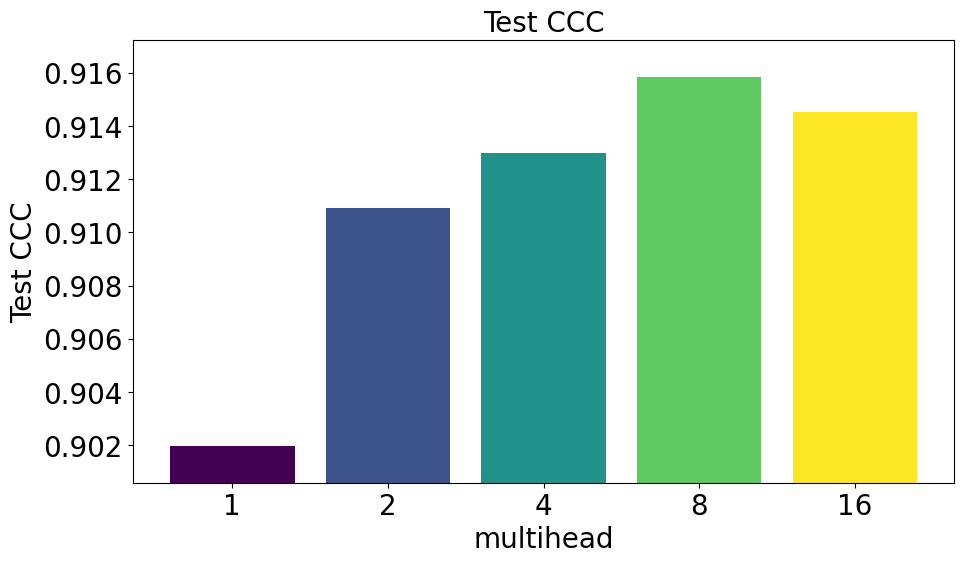

All plots have been generated and saved.


In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Axes

# Path to the folder containing the 5 train folders
base_path = "C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\"

# Folder names
folders = ["1 train", "2 train", "3 train", "4 train", "5 train"]

# Dictionary with metric names as keys and lists of file names as values
file_names = {
    "Test CCC": ["test_ccc1.csv", "test_ccc2.csv", "test_ccc3.csv", "test_ccc4.csv", "test_ccc5.csv"]
}

# Plot settings
font_size = 20
# Custom x-axis labels
x_labels = ["1", "2", "4", "8", "16"]
save_folder = "C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\"

os.makedirs(save_folder, exist_ok=True)

# Iterate over each metric
for metric, files in file_names.items():
    # Collect the values for the metric from each file
    values = []
    for folder, file_name in zip(folders, files):
        file_path = os.path.join(base_path, folder, file_name)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            value = df.iloc[0, 0]  # Assuming the value is in the first row and column
            values.append(value)

    # Calculate dynamic y-axis limits based on values
    y_min = np.min(values) - 0.1 * np.ptp(values)  # Subtract 10% of the range
    y_max = np.max(values) + 0.1 * np.ptp(values)  # Add 10% of the range


    # Create a color map with a unique color for each bar
    colors = plt.cm.viridis(np.linspace(0, 1, len(values)))  # Use 'viridis' colormap

    # Plot with custom colors and x-axis labels
    plt.figure(figsize=(10, 6))
    plt.bar(x_labels, values, color=colors)  # Assign unique colors for each bar
    plt.title(f"{metric}", fontsize=font_size)
    plt.xlabel("multihead", fontsize=font_size)
    plt.ylabel(metric, fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.ylim(y_min, y_max)  # Set y-axis limits dynamically
    plt.tight_layout(pad=2)
    
    # Save plot
    plot_save_path = os.path.join(save_folder, f"{metric.replace(' ', '__').lower()}.png")
    plt.savefig(plot_save_path, dpi = 1200)
    plt.show()

print("All plots have been generated and saved.")

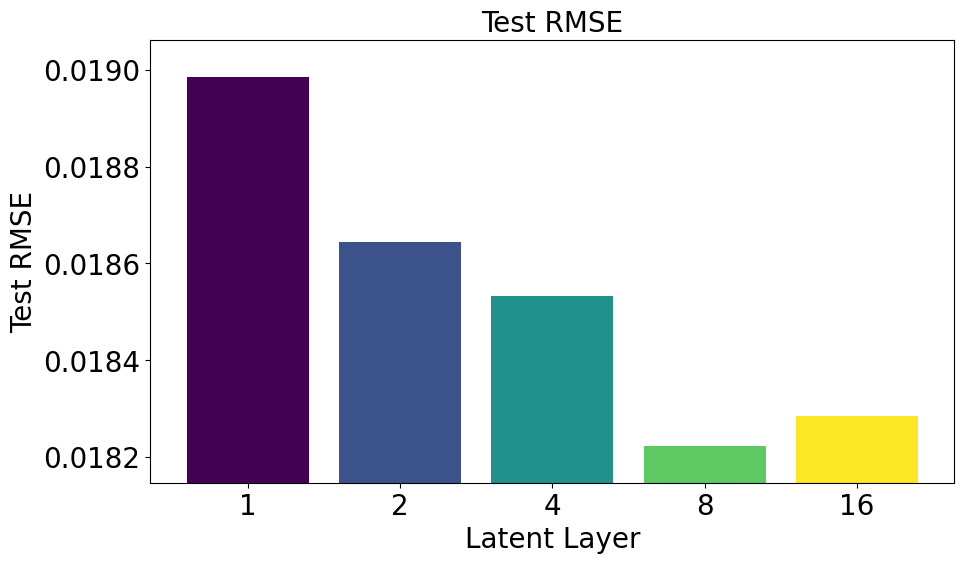

All plots have been generated and saved.


In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Axes

# Path to the folder containing the 5 train folders
base_path = "C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\"

# Folder names
folders = ["1 train", "2 train", "3 train", "4 train", "5 train"]

# Dictionary with metric names as keys and lists of file names as values
file_names = {
    "Test RMSE": ["test_rmse1.csv", "test_rmse2.csv", "test_rmse3.csv", "test_rmse4.csv", "test_rmse5.csv"]
}

# Plot settings
font_size = 20
# Custom x-axis labels
x_labels = ["1", "2", "4", "8", "16"]
save_folder = "C:\\Users\\HP\\Desktop\\New Ascend Results\\PBMC\\multihead tuning graphs\\"

os.makedirs(save_folder, exist_ok=True)

# Iterate over each metric
for metric, files in file_names.items():
    # Collect the values for the metric from each file
    values = []
    for folder, file_name in zip(folders, files):
        file_path = os.path.join(base_path, folder, file_name)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            value = df.iloc[0, 0]  # Assuming the value is in the first row and column
            values.append(value)

    # Calculate dynamic y-axis limits based on values
    y_min = np.min(values) - 0.1 * np.ptp(values)  # Subtract 10% of the range
    y_max = np.max(values) + 0.1 * np.ptp(values)  # Add 10% of the range


    # Create a color map with a unique color for each bar
    colors = plt.cm.viridis(np.linspace(0, 1, len(values)))  # Use 'viridis' colormap

    # Plot with custom colors and x-axis labels
    plt.figure(figsize=(10, 6))
    plt.bar(x_labels, values, color=colors)  # Assign unique colors for each bar
    plt.title(f"{metric}", fontsize=font_size)
    plt.xlabel("Latent Layer", fontsize=font_size)
    plt.ylabel(metric, fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.ylim(y_min, y_max)  # Set y-axis limits dynamically
    plt.tight_layout(pad=2)
    
    # Save plot
    plot_save_path = os.path.join(save_folder, f"{metric.replace(' ', '__').lower()}.png")
    plt.savefig(plot_save_path, dpi = 1200)
    plt.show()

print("All plots have been generated and saved.")